The purpose of this notebook is to get a feel for the sea level distributions along the coastlines. Here, we'll focus on random points equally distributed throughout the globe

Clearly, these cities aren't evenly distributed along the coastlines—some regions have many more cities than others. As a change of plans, let's just plot random locations (e.g. every 10000th data point)

In [128]:
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [129]:
# Load bathymetry data
bath_data = xr.open_dataset('~/Research/data/bathymetry.nc')
xt_coastal = np.load('/Users/andrewbrettin/Research/data/xt_coastal.npy')
yt_coastal = np.load('/Users/andrewbrettin/Research/data/yt_coastal.npy')

In [130]:
# Import sea level data
sea_level = xr.open_dataarray('/Users/andrewbrettin/Research/data/seasonal_anomaly.nc')
sea_level

<xarray.DataArray (time: 5844, z: 202576)>
[1183854144 values with dtype=float32]
Coordinates:
    yt_ocean   (z) float64 ...
    xt_ocean   (z) float64 ...
  * time       (time) object 0185-01-01 12:00:00 ... 0200-12-31 12:00:00
    dayofyear  (time) int64 ...
Dimensions without coordinates: z

In [150]:
# Create dataframe of sea level statistics for coastal coordinates
sea_level_statistics = xr.open_dataset('~/Research/data/sea_level_statistics_seasonalremoved.nc')
sea_level_statistics = sea_level_statistics.drop_vars('sla_histogram').drop_dims('bins')
df = sea_level_statistics.to_dataframe()
# df = df.drop(columns=['skew', 'kurtosis'])
df;

In [151]:
# Add shelf length data
shelf_length = bath_data['shelf_length']
shore_angle = bath_data['theta']
flattened_shelf_lengths = shelf_length.sel(yt_ocean=xr.DataArray(yt_coastal, dims='z'), xt_ocean=xr.DataArray(xt_coastal, dims='z'))
flattened_shore_angles = shore_angle.sel(yt_ocean=xr.DataArray(yt_coastal, dims='z'), xt_ocean=xr.DataArray(xt_coastal, dims='z'))

df['shelf_lengths'] = flattened_shelf_lengths.data/1000 # Results in km

In [152]:
# Delete all elements where there is no actual sea level data:
df = df[df['std'] > 0]

# Truncate table to latitudes < 60 N/S:
df = df[np.abs(df['yt_ocean']) < 60]
df


,yt_ocean,xt_ocean,std,skew,kurtosis,shelf_lengths
z,,,,,,
3,6.038792,-279.95,0.034749,-0.401816,4.621854,11.059860
4,6.138228,-279.95,0.035345,-0.398961,4.562818,22.117723
7,9.900367,-279.95,0.031537,-0.085927,3.987101,142.360565
8,12.255470,-279.95,0.041972,0.249585,4.033119,43.674950
34,5.939337,-279.85,0.034682,-0.379638,4.520888,11.062389
...,...,...,...,...,...,...
202570,11.178407,79.95,0.042302,0.272372,4.004626,42.927339
202571,11.276494,79.95,0.042597,0.297748,4.221291,20.999208
202572,11.962145,79.95,0.042647,0.283448,4.256202,33.150082


Note that the indices in this new table 'z' aren't those indexed by iloc[i]... For instance iloc[3] returns the 4th element in this table (e.g. 'z'=6). loc[i] returns i though:

In [11]:
print(df.iloc[3].name)
print(df.loc[3].name)

6
3


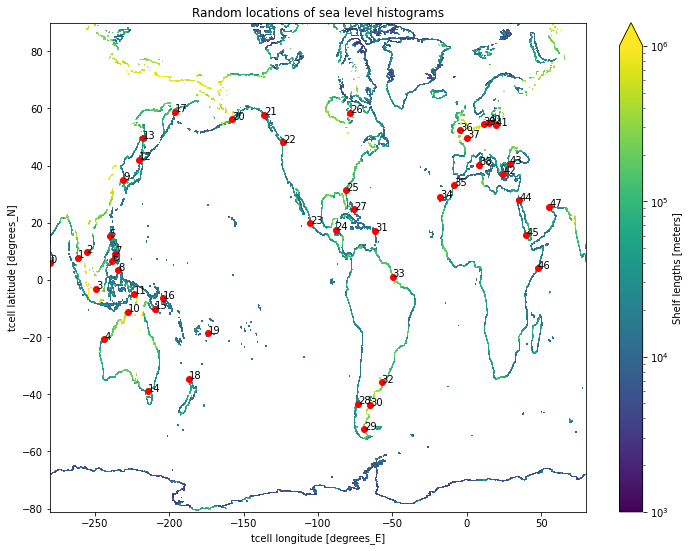

In [186]:
# Loop through and select points in table to plot
table_length = len(df)
num_points = 48
indexstep = table_length // num_points

fig, ax = plt.subplots(figsize=(12,9))
bath_data.shelf_length.plot(ax=ax, norm=colors.LogNorm(vmin=1000, vmax=1e6))

z_list = np.zeros(num_points)
for i in range(num_points):
    z = df.iloc[i*indexstep].name
    ax.plot(xt_coastal[z], yt_coastal[z], 'ro')
    ax.annotate(str(i), (xt_coastal[z], yt_coastal[z]))
    z_list[i] = z
z_list = [int(z) for z in z_list]
ax.set_title('Random locations of sea level histograms')
fig.savefig('./sl_distribution_exploration_output/points_explored')

Our next 

In [84]:
# Load sea level statistics
sea_level = xr.open_dataarray('/Users/andrewbrettin/Research/data/seasonal_anomaly.nc')
sea_level_stats = xr.open_dataset('~/Research/data/sea_level_statistics.nc')
hists = sea_level_stats.sla_histogram

In [85]:
num_coastal_coords = len(hists.data[0, :])

In [97]:
# Configure number of bins and range
num_bins = 50
lower_bin = -.5
upper_bin = .5

<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))
<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))
<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig

<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))
<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))
<ipython-input-185-e7cc92b8be7a>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig

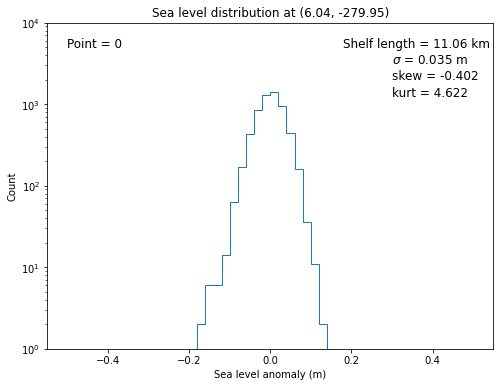

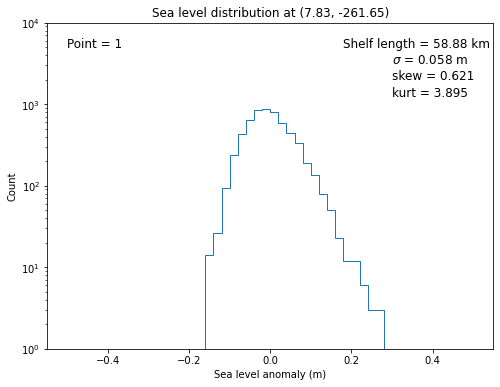

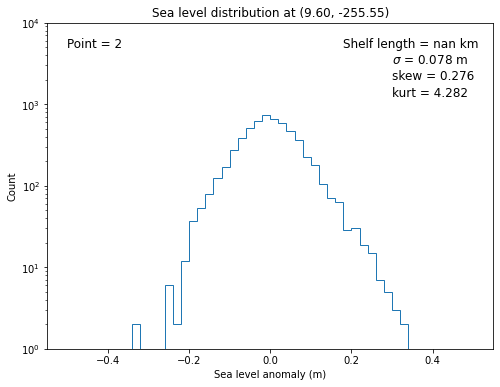

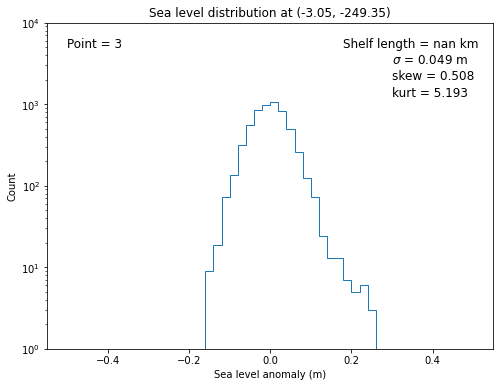

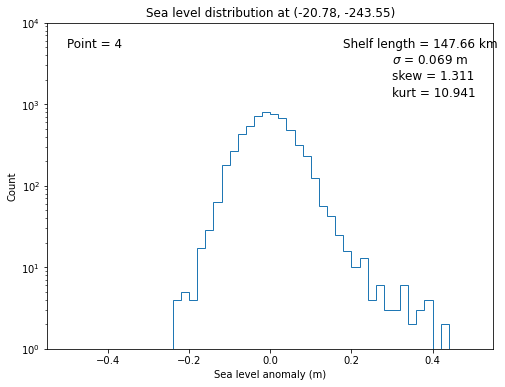

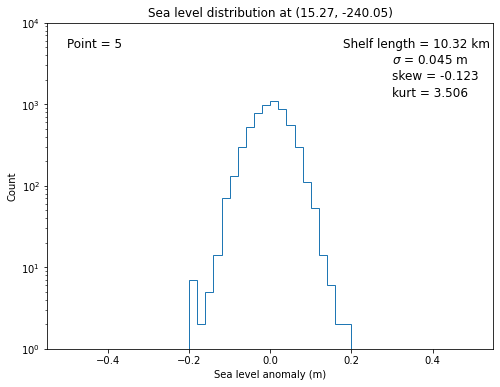

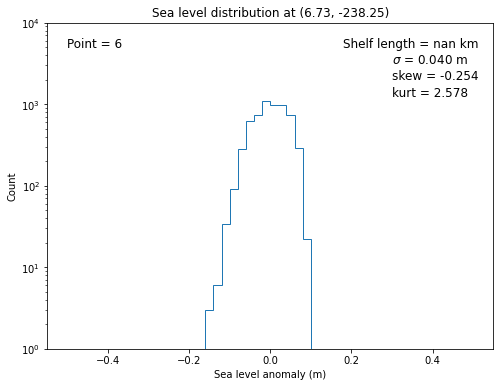

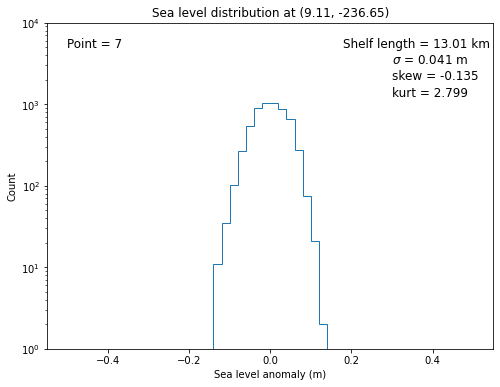

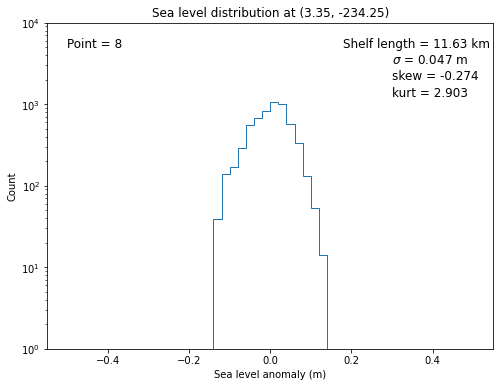

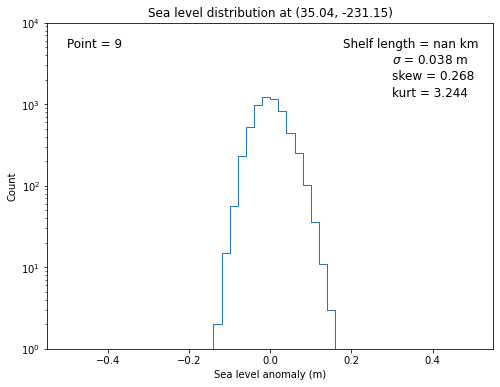

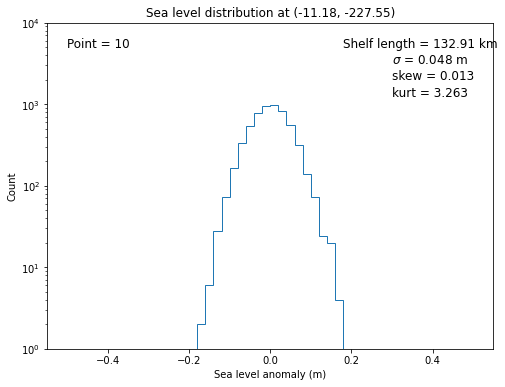

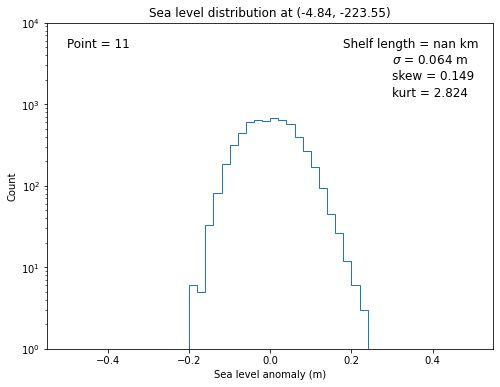

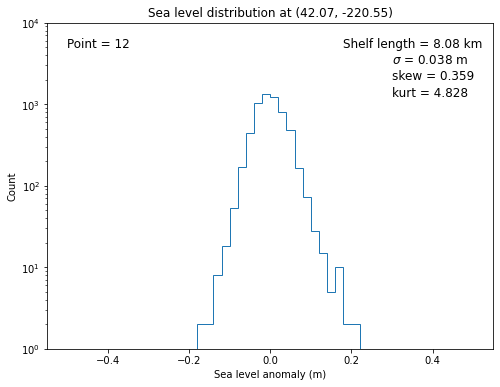

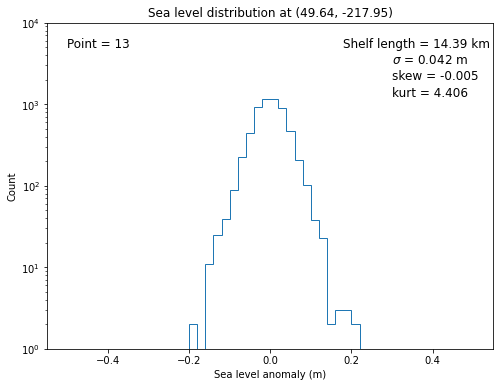

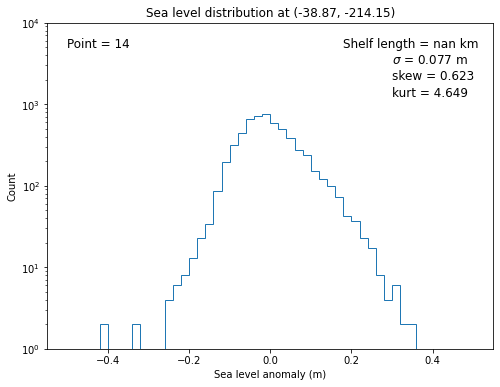

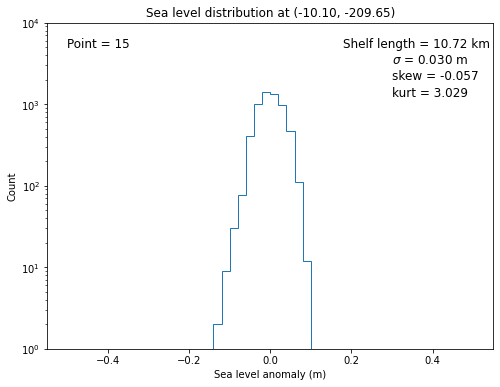

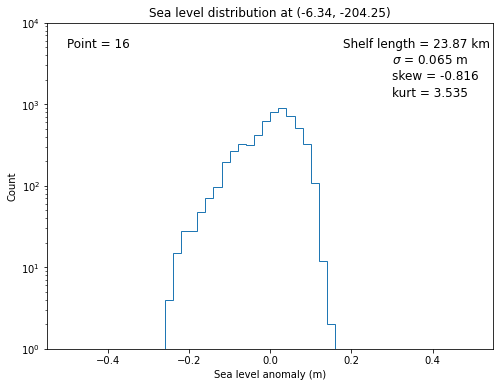

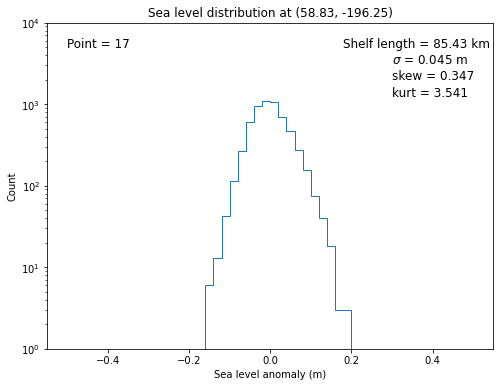

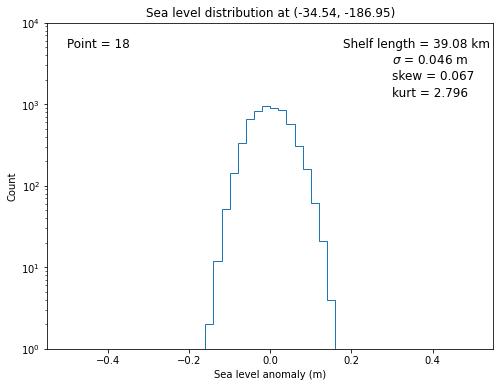

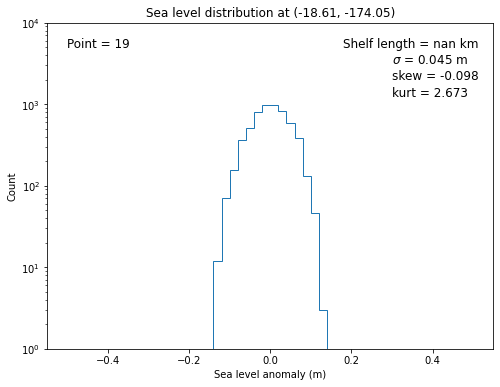

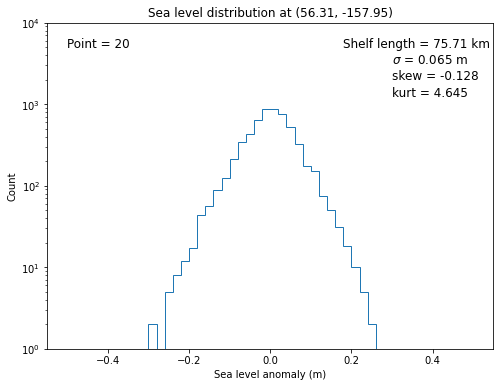

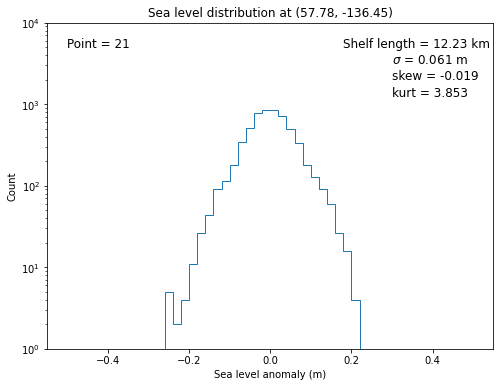

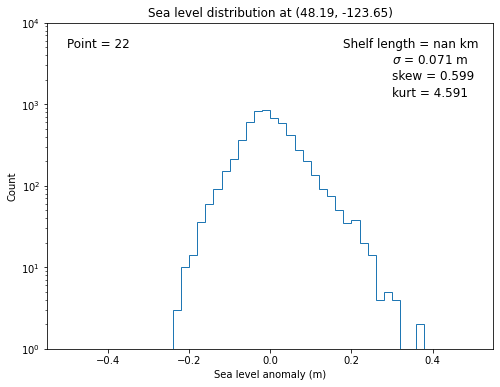

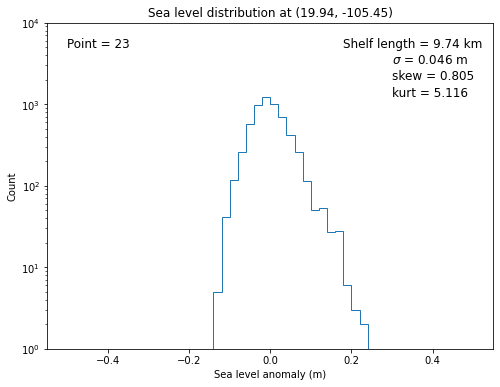

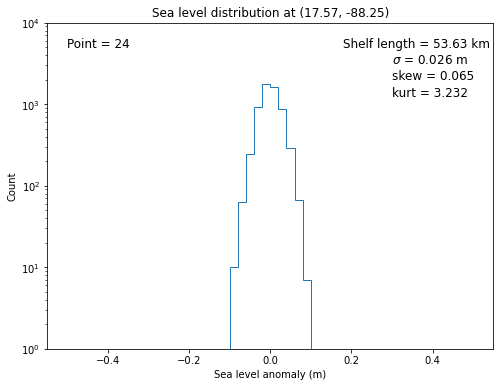

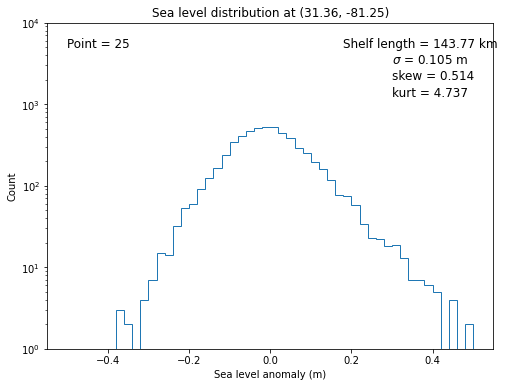

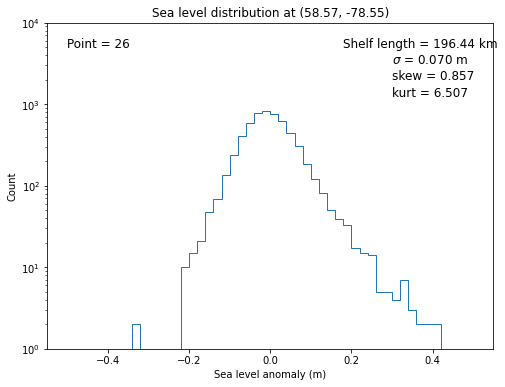

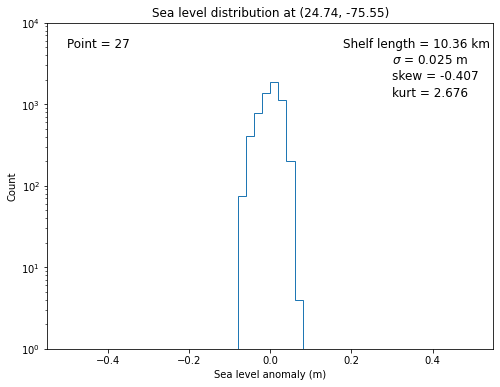

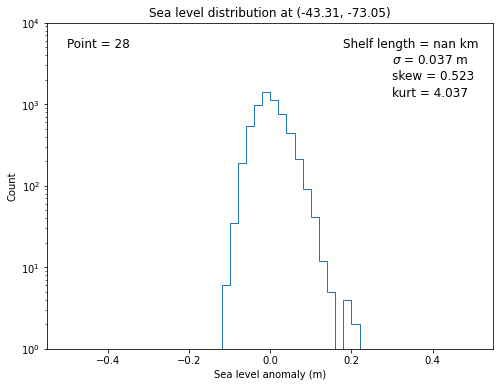

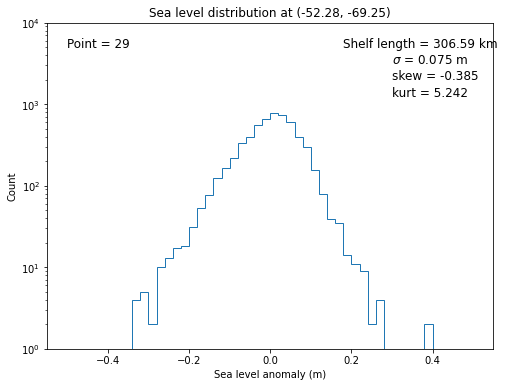

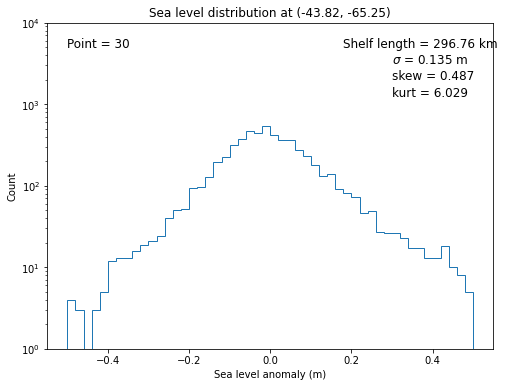

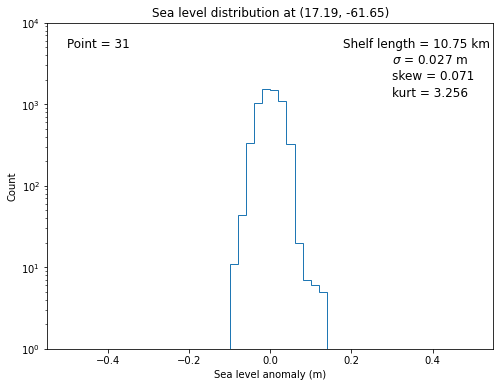

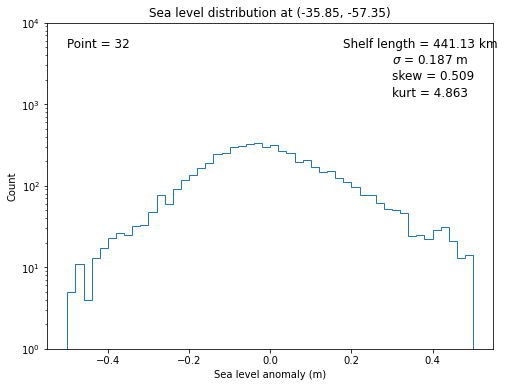

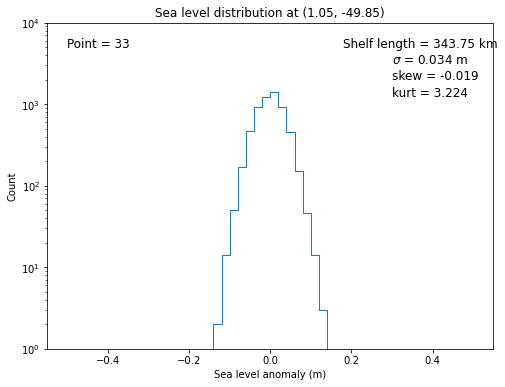

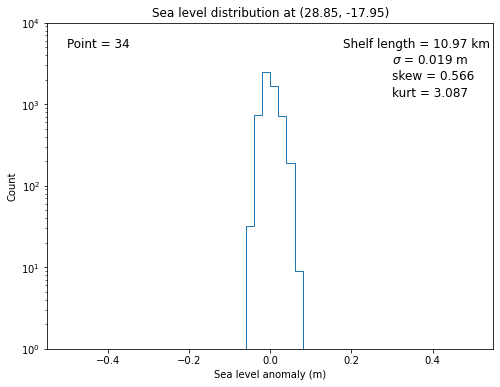

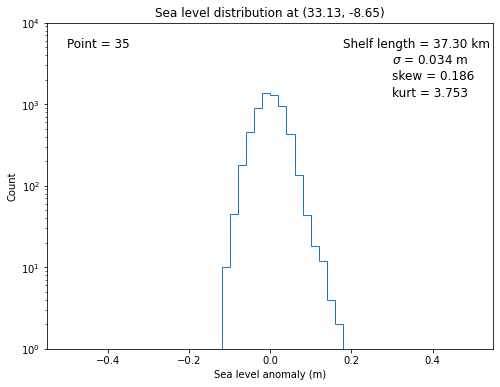

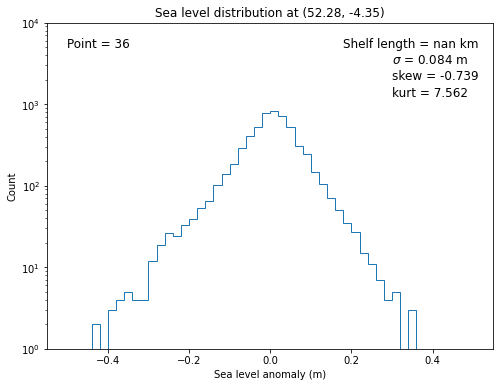

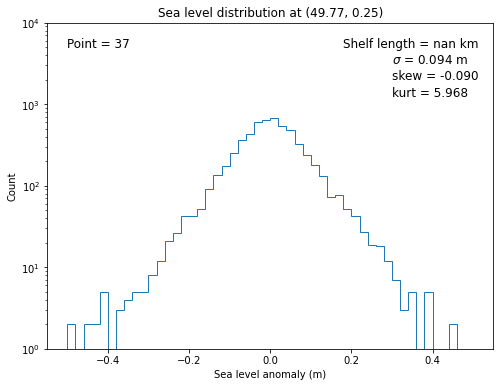

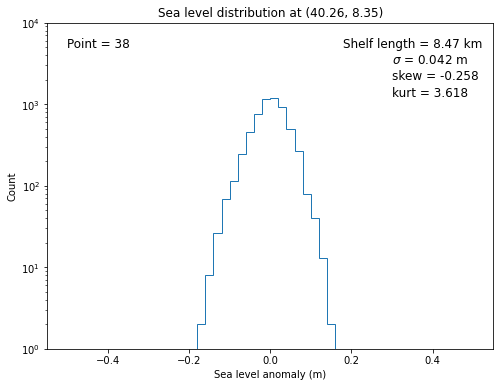

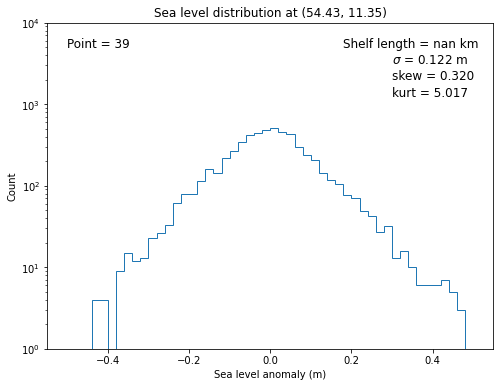

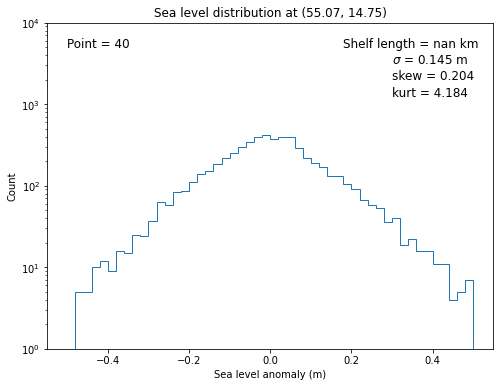

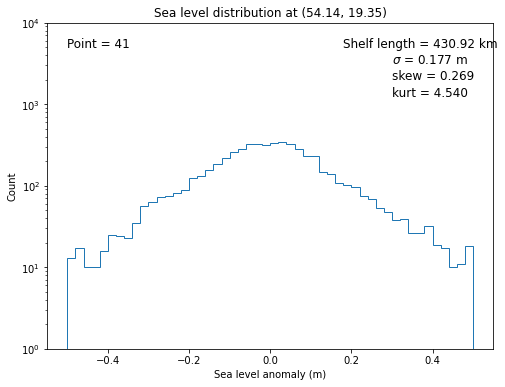

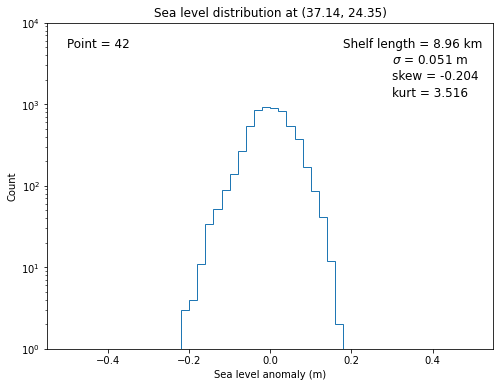

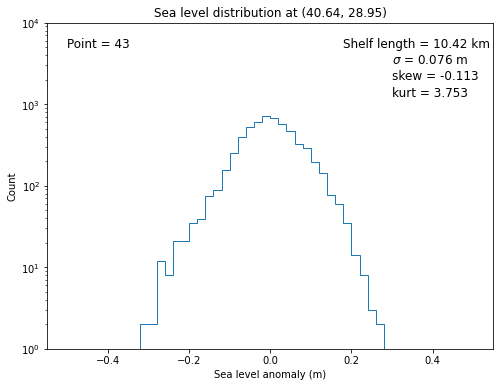

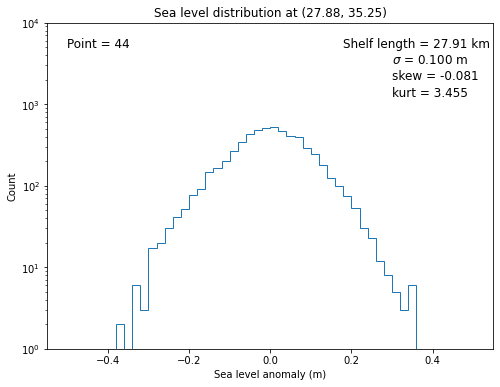

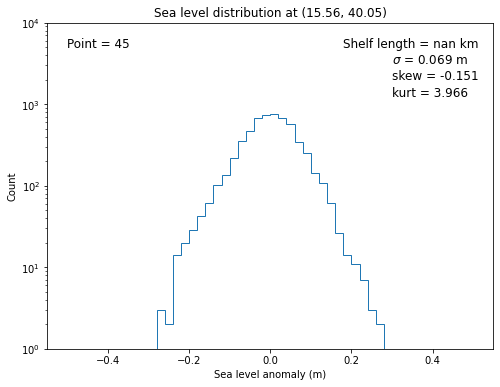

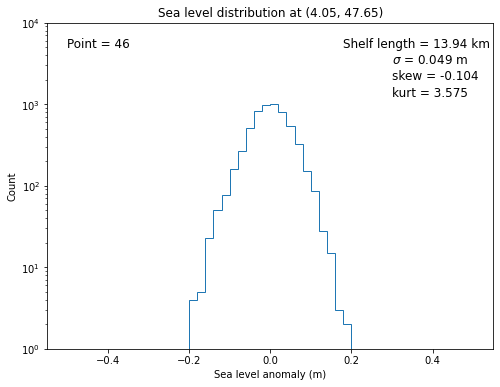

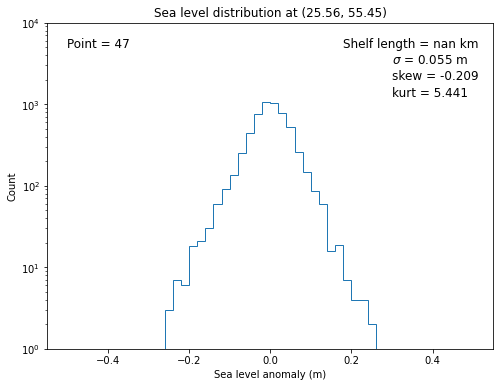

In [185]:
# for i in range(num_points):
for i in range(num_points):
    fig, ax = plt.subplots(figsize=(8,6))
    z = z_list[i]
    point = sea_level.isel(z=z)
    n, bins, patches = ax.hist(point.data, bins=num_bins, range=(lower_bin, upper_bin),
                                        histtype='step')
    ax.set_xlabel('Sea level anomaly (m)')
    ax.set_ylabel('Count')
    ax.set_yscale('log')
    long = '{0:.2f}'.format(df.loc[z]['xt_ocean'])
    lat = '{0:.2f}'.format(df.loc[z]['yt_ocean'])
    shelf_length_string = '{0:.2f}'.format(df.loc[z]['shelf_lengths'])
    std_string = '{0:.3f}'.format(df.loc[z]['std'])
    skew_string = '{0:.3f}'.format(df.loc[z]['skew'])
    kurt_string = '{0:.3f}'.format(df.loc[z]['kurtosis'])
    
    ax.set_title('Sea level distribution at (' + lat + ', ' + long + ')')
    
    ax.text(-.5, 10**3.7, 'Point = ' + str(i), fontsize=12)
    ax.text(.3, 10**3.5, r'$\sigma$ = ' + std_string + ' m', fontsize=12)
    ax.text(.3, 10**3.3, 'skew = ' + skew_string, fontsize=12)
    ax.text(.3, 10**3.1, 'kurt = ' + kurt_string, fontsize=12)
    ax.text(.18, 10**3.7, 'Shelf length = ' + shelf_length_string + ' km', fontsize=12)
    
    ax.set_ylim(1, 1e4)
    fig.savefig('./sl_distribution_exploration_output/histogram_at_point_' + str(i))

In [144]:
df

,yt_ocean,xt_ocean,std,shelf_lengths
z,,,,
3,6.038792,-279.95,0.034749,11.059860
4,6.138228,-279.95,0.035345,22.117723
7,9.900367,-279.95,0.031537,142.360565
8,12.255470,-279.95,0.041972,43.674950
34,5.939337,-279.85,0.034682,11.062389
...,...,...,...,...
202570,11.178407,79.95,0.042302,42.927339
202571,11.276494,79.95,0.042597,20.999208
202572,11.962145,79.95,0.042647,33.150082


In [18]:
# Plotting histograms
fig = plt.figure(figsize=(18, 4))
axes = [fig.add_subplot(1, 3, k+1) for k in range(3)]
for k in range(3):
    point = flattened_sla.isel(z=z_vals[k])
    n, bins, patches = axes[k].hist(point.data, bins=num_bins, range=(lower_bin[k], upper_bin[k]),
                                    histtype='step')
    axes[k].set_xlabel('Sea level anomaly (m)')
    axes[k].set_ylabel('Count')
    axes[k].set_yscale('log')
    axes[k].set_title(titles[k])
    axes[k].set_ylim(1, 1e4)

<xarray.DataArray 'sla_histogram' (bins: 50, z: 202576)>
[10128800 values with dtype=float32]
Coordinates:
  * bins      (bins) float64 -1.587 -1.522 -1.456 -1.391 ... 1.489 1.554 1.62
    xt_ocean  (z) float64 ...
    yt_ocean  (z) float64 ...
Dimensions without coordinates: z

In [29]:
hists.isel(z=1011)

<xarray.DataArray 'sla_histogram' (bins: 50)>
array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 2.100e+01, 4.940e+02, 8.110e+02, 6.540e+02, 5.830e+02,
       7.420e+02, 1.013e+03, 8.660e+02, 4.930e+02, 1.280e+02, 3.400e+01,
       4.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00], dtype=float32)
Coordinates:
  * bins      (bins) float64 -1.587 -1.522 -1.456 -1.391 ... 1.489 1.554 1.62
    xt_ocean  float64 ...
    yt_ocean  float64 ...